## Import Required Libraries

In [2]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torchvision.utils as vutils
from models.basic_gan import create_generator, create_discriminator


## Define Helper Functions

In [3]:
def sample_noise(batch_size, latent_dim, device="cpu"):
    """
    Sample random noise vectors from a standard Gaussian distribution.
    """
    z = torch.randn(batch_size, latent_dim, device=device)
    return z


In [4]:
def visualize_generated_images(images, num_images=16, title="Generated Images"):
    """
    Visualize generated images in a grid.
    """
    # If images are flattened (784,), reshape to (batch_size, 1, 28, 28)
    if images.dim() == 2:
        images = images.view(-1, 1, 28, 28)

    # Take only num_images
    images = images[:num_images]

    # Denormalize from [-1, 1] to [0, 1] for visualization
    images = (images + 1) / 2

    # Create a grid using torchvision.utils
    grid = vutils.make_grid(images, nrow=4, normalize=False, padding=2)

    # Plot
    plt.figure(figsize=(8, 8))
    # Transpose from (C, H, W) to (H, W, C) and convert to numpy
    plt.imshow(grid.permute(1, 2, 0).cpu().numpy())
    plt.title(title)
    plt.axis("off")
    plt.tight_layout()
    plt.show()


## Main Exercise Flow

### Configuration

Set up device and model parameters.

In [5]:
# Configuration
device = "cuda" if torch.cuda.is_available() else "cpu"
latent_dim = 100
batch_size = 16

print(f"Using device: {device}")


Using device: cuda


### Step 1: Create Generator

In [6]:
print("\n[1] Creating generator...")
generator = create_generator(latent_dim=latent_dim, device=device)
generator.eval()  # Set to evaluation mode
print(f"    Generator created with {latent_dim}-dimensional input")



[1] Creating generator...
    Generator created with 100-dimensional input


### Step 2: Sample Noise

In [7]:
print(f"\n[2] Sampling {batch_size} noise vectors...")
z = sample_noise(batch_size, latent_dim, device=device)
print(f"    Noise shape: {z.shape}")



[2] Sampling 16 noise vectors...
    Noise shape: torch.Size([16, 100])


### Step 3: Generate Images

In [8]:
print(f"\n[3] Generating images...")
with torch.no_grad():
    fake_images = generator(z)
print(f"    Generated images shape: {fake_images.shape}")



[3] Generating images...
    Generated images shape: torch.Size([16, 784])


### Step 4: Visualize Generated Images


[4] Visualizing generated images...


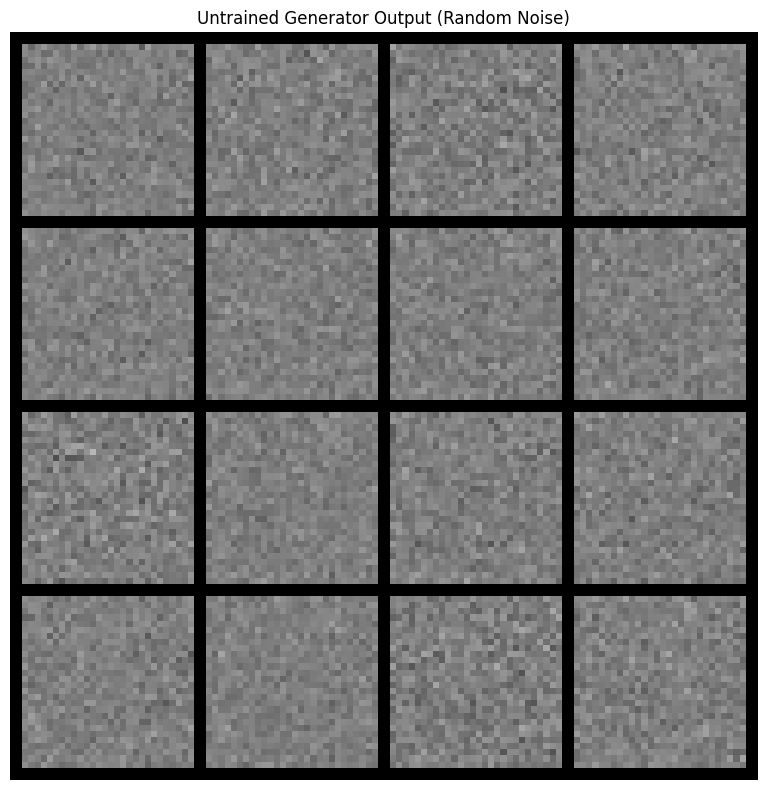

In [9]:
print(f"\n[4] Visualizing generated images...")
visualize_generated_images(
    fake_images, num_images=16, title="Untrained Generator Output (Random Noise)"
)


## Analysis and Observations

In [10]:
print("\n Exercise complete!")
print("\nObservations:")
print("- Notice the image looks like random noise? That's because the generator")
print("  is untrained - its weights are random!")
print("- Once we train it with a discriminator (GAN), these will start to")
print("  look like actual digits.")



 Exercise complete!

Observations:
- Notice the image looks like random noise? That's because the generator
  is untrained - its weights are random!
- Once we train it with a discriminator (GAN), these will start to
  look like actual digits.
